# NAIST DSC Summer Seminar 2019


[Open in Google Colaboratory](https://colab.research.google.com/drive/1ZZZowSddlEqjAAkj2CQgoDozTOsPDYvR)

## はじめてのGoogle Colaboratory

Google ColaboratoryはGoogleがサービスしているクラウド上で提供されるJupyter notebookの実行環境です。
自分のパソコンにプログラミング環境をインストールすることなしに、オンラインのサーバーでプログラムを実行し、その結果をブラウザに表示させることができる便利な仕組みです。

クラウドを借りている関係上、長時間の計算や大量のデータの処理などにはあまり向きませんが、簡単なプログラムをテストするには十ニ分に便利な計算環境と言えます。
セッションの設定でGPUやTPUを使って計算することもできるので（無料！）、TensorFlowを使った簡単な深層学習モデルの実行などにも十分なパワーがあります。

このセミナーではGoogle Colaboratory上でPythonを使って自然言語処理のデータ解析を実習していきます。Pythonの基本的な文法などについては細かく説明しませんが、必要なら検索なりオンラインヘルプなどを参照にしていただくか、わからなければ気軽にスタッフに声をかけてください。

## Jupyter notebookとは
Jupyter notebookはこの文章のようなテキストを記述する「マークダウンセル」と、
プログラムを入力したり実行結果を表示したりする「コードセル」が混在した「ノートブック」と呼ばれるファイル形式です（Mathematicaを使ったことがある人は似たような形式に覚えがあるかもしれません）。Jupyter は Webブラウザだけで操作可能な点、結果をグラフィカルに整理しやすい点などから、主にデータ解析の分野で人気を博し、近年急速に普及が進んできています。

### マークダウンセル
「マークダウンセル」ではHTMLのように文章を「マークダウンタグ」でいろいろ加工して表示したり、TeXのように数式を埋め込んだりすることができます。

*イタリック*や**ボールド**のように文章を修飾したり、

こんな風に数式などを文章中、$p(D) = \int_0^1 p(D|w)p(w) dw$あるいは独立した段落の形で

$$B = \frac{n!}{k! (n-k)!}$$

埋め込めるほか、

- リスト
- 表記
- など

を使うことができます。

文章の**このブロックをクリック**してみてください。ブロック全体がハイライトされたかと思います。これが一つのセルになります。

次に、**Return**を押す、あるいは、**この段落をダブルクリック**してみてください。表示が変わったかと思います。これはJupyterの"編集モード"です。この状態で文章やマークダウンタグをいろいろ書き換えることができます。
上の文章の修飾されている部分にマークダウンタグが追加され、数式はTeX表記になっていると思います。

編集が終わったら、Shift+Returnを押してみてください。現在のセルは最初の状態、Jupyterの"コマンドモード"に戻り、次のセルが選択されます。

新しいセルを挿入する、セルを分割する、セルを上下のセルと入れ替えて移動させる、などなど、メニューまたはショートカットキーを使って操作しながらいろいろと編集することができます。

### コードセル

「コードセル」では対話的にプログラムを実行できます（Google Colabでは基本的にPythonのシェルを使っていますが、自分で環境を構築したJupyterならばRやJuliaなど様々な言語に対応させることも可能です）。プリント文などの実行結果や変数の表示、プロットなどはコードセルに続いて表示されます。

下のコードセルをクリックして選択し、左の矢印マークをクリックするか Shift+Return を押してみましょう。

最初の一回は「このノートを実行していいですか」という警告ウィンドウが出ると思いますが、「リセットする」のチェックを外し、「このまま実行」をクリックしてください。

In [3]:
print("Hello, Google Colaboratory!\n")

Hello, Google Colaboratory!



print文が実行され、文字列が表示されたでしょうか。

コードセルを使って電卓がわりに色々な計算を実行させることもできます。

In [4]:
(123 + 456) / 789

0.7338403041825095

より高度な計算をするにはPythonのライブラリであるnumpyなどを利用します。

Google Colabにはnumpy, scikit-learn, pandasを始めとする定番のライブラリはほぼインスール済みなので、そのままimportすれば使えます。

In [0]:
import numpy as np

np.sqrt(2)


1.4142135623730951

## グラフのプロット

計算したデータをもとにグラフをプロットして、図をノート内に張り込むこともできます。

Pythonを使った図の描画にはシンプルなものから高度なものまでいろいろなグラフ描画ツールが提供されています。

ここでは二つほどサンプルを実行してみます。より複雑な図を描画するにはそれぞれのライブラリのマニュアルを参照してください。

まずサンプルデータをインポートしておきます。

In [5]:
# load an example dataset

from vega_datasets import data
cars = data.cars()

cars.shape

(406, 9)

### matplotlib
基本的な描画ライブラリとして定番の一つである[matplotlib](https://matplotlib.org)を使ってみましょう。

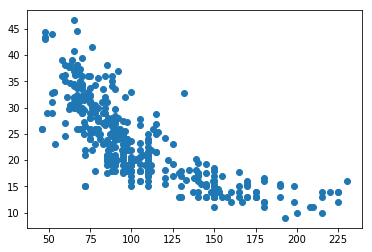

In [0]:
# plot 'cars' data using matplotlib library
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cars['Horsepower'], cars['Miles_per_Gallon'],"o")

### Altair
同じデータを比較的最近出てきたツールである
[Altair](https://altair-viz.github.io/)を使ってプロットしてみましょう。


In [0]:
# plot the same data using Altair library

import altair as alt
# alt.renderers.enable('notebook')

In [0]:
# plot the dataset, referencing dataframe column names

alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color='Origin'
).interactive()

Chart({
  data:      Acceleration  Cylinders  Displacement  ...  Origin  Weight_in_lbs       Year
  0            12.0          8         307.0  ...     USA           3504 1970-01-01
  1            11.5          8         350.0  ...     USA           3693 1970-01-01
  2            11.0          8         318.0  ...     USA           3436 1970-01-01
  3            12.0          8         304.0  ...     USA           3433 1970-01-01
  4            10.5          8         302.0  ...     USA           3449 1970-01-01
  5            10.0          8         429.0  ...     USA           4341 1970-01-01
  6             9.0          8         454.0  ...     USA           4354 1970-01-01
  7             8.5          8         440.0  ...     USA           4312 1970-01-01
  8            10.0          8         455.0  ...     USA           4425 1970-01-01
  9             8.5          8         390.0  ...     USA           3850 1970-01-01
  10           17.5          4         133.0  ...  Europe           3090 1970-01-01
  11           11.5          8         350.0  ...     USA           4142 1970-01-01
  12           11.0          8         351.0  ...     USA           4034 1970-01-01
  13           10.5          8         383.0  ...     USA           4166 1970-01-01
  14           11.0          8         360.0  ...     USA           3850 1970-01-01
  15           10.0          8         383.0  ...     USA           3563 1970-01-01
  16            8.0          8         340.0  ...     USA           3609 1970-01-01
  17            8.0          8         302.0  ...     USA           3353 1970-01-01
  18            9.5          8         400.0  ...     USA           3761 1970-01-01
  19           10.0          8         455.0  ...     USA           3086 1970-01-01
  20           15.0          4         113.0  ...   Japan           2372 1970-01-01
  21           15.5          6         198.0  ...     USA           2833 1970-01-01
  22           15.5          6         199.0  ...     USA           2774 1970-01-01
  23           16.0          6         200.0  ...     USA           2587 1970-01-01
  24           14.5          4          97.0  ...   Japan           2130 1970-01-01
  25           20.5          4          97.0  ...  Europe           1835 1970-01-01
  26           17.5          4         110.0  ...  Europe           2672 1970-01-01
  27           14.5          4         107.0  ...  Europe           2430 1970-01-01
  28           17.5          4         104.0  ...  Europe           2375 1970-01-01
  29           12.5          4         121.0  ...  Europe           2234 1970-01-01
  ..            ...        ...           ...  ...     ...            ...        ...
  376          18.6          4         112.0  ...     USA           2640 1982-01-01
  377          18.0          4         112.0  ...     USA           2395 1982-01-01
  378          16.2          4         112.0  ...     USA           2575 1982-01-01
  379          16.0          4         135.0  ...     USA           2525 1982-01-01
  380          18.0          4         151.0  ...     USA           2735 1982-01-01
  381          16.4          4         140.0  ...     USA           2865 1982-01-01
  382          20.5          4         151.0  ...     USA           3035 1982-01-01
  383          15.3          4         105.0  ...  Europe           1980 1982-01-01
  384          18.2          4          91.0  ...   Japan           2025 1982-01-01
  385          17.6          4          91.0  ...   Japan           1970 1982-01-01
  386          14.7          4         105.0  ...     USA           2125 1982-01-01
  387          17.3          4          98.0  ...     USA           2125 1982-01-01
  388          14.5          4         120.0  ...   Japan           2160 1982-01-01
  389          14.5          4         107.0  ...   Japan           2205 1982-01-01
  390          16.9          4         108.0  ...   Japan           2245 1982-01-01
  391          15.0          4        

こちらは図をマウスでドラッグして座標軸を移動させたり、ホイールで拡大縮小したりできるのが特徴です。

`x`と`y`に適当な乱数を生成して、いろいろなプロットを試してみましょう。

In [0]:
# plot random data in various forms using Altair

import pandas as pd
import numpy as np
x1 = np.random.normal(0,1,100)
y1 = np.random.normal(0,1,100)
tmp = pd.DataFrame({'x': x1, 'y': y1})

In [0]:
# bar chart

alt.Chart(tmp).mark_bar().encode(
  x='x',
  y='y',
)



Chart({
  data:            x         y
  0   0.347109  0.599366
  1   1.854349  0.953237
  2   1.278629 -0.003081
  3   0.260609 -2.058682
  4  -0.050605 -1.474240
  5   0.956497  2.972736
  6  -0.439643  0.060828
  7  -0.534888 -1.372429
  8  -0.921785  0.945701
  9  -0.807121  0.413925
  10  0.364181 -1.302715
  11 -1.497984 -0.523398
  12 -2.116363  0.321701
  13 -0.879897  1.215830
  14 -0.439697 -0.099951
  15 -2.141077 -0.688275
  16 -0.362212 -0.019135
  17 -0.137874 -0.174079
  18 -0.666179 -0.570912
  19  0.407526  0.180050
  20  0.220567 -0.941705
  21  1.516421  0.490164
  22 -1.613832 -0.827268
  23 -0.954254 -1.448947
  24  0.672695 -1.830459
  25  0.532415 -1.237629
  26  0.245833 -0.252842
  27  1.089205  0.178286
  28 -1.648000  0.120658
  29 -0.023203 -1.065187
  ..       ...       ...
  70  1.253252 -0.260889
  71  0.295772 -0.800760
  72  1.054156  1.760396
  73  0.115036  0.860396
  74 -1.214673  0.548734
  75  1.701539  0.655380
  76  0.544850  0.314522
  77  2.284320 -0.440311
  78 -0.970134  1.841473
  79 -0.909942 -0.033001
  80 -1.602835 -0.587077
  81  0.455146 -0.240864
  82 -0.646256 -0.340064
  83 -0.379483  0.105109
  84  0.567582 -1.536749
  85  0.543092 -0.117247
  86  0.569071  0.322330
  87 -0.688421 -0.669454
  88 -1.393165 -0.124639
  89 -2.082800 -1.482786
  90  0.698908  0.206245
  91 -0.446637 -0.664001
  92  0.156317  1.893655
  93  0.267767  0.264509
  94  0.980985 -0.405380
  95  0.174616  0.945213
  96  0.402289 -0.159483
  97 -0.855513  0.226860
  98  1.408650 -0.738516
  99  0.028054  0.355757
  
  [100 rows x 2 columns],
  encoding: FacetedEncoding({
    x: X({
      field: 'x',
      type: 'quantitative'
    }),
    y: Y({
      field: 'y',
      type: 'quantitative'
    })
  }),
  mark: 'bar'
})

In [0]:
# scatter plot

alt.Chart(tmp).mark_point().encode(
  x='x',
  y='y',
)


Chart({
  data:            x         y
  0   0.347109  0.599366
  1   1.854349  0.953237
  2   1.278629 -0.003081
  3   0.260609 -2.058682
  4  -0.050605 -1.474240
  5   0.956497  2.972736
  6  -0.439643  0.060828
  7  -0.534888 -1.372429
  8  -0.921785  0.945701
  9  -0.807121  0.413925
  10  0.364181 -1.302715
  11 -1.497984 -0.523398
  12 -2.116363  0.321701
  13 -0.879897  1.215830
  14 -0.439697 -0.099951
  15 -2.141077 -0.688275
  16 -0.362212 -0.019135
  17 -0.137874 -0.174079
  18 -0.666179 -0.570912
  19  0.407526  0.180050
  20  0.220567 -0.941705
  21  1.516421  0.490164
  22 -1.613832 -0.827268
  23 -0.954254 -1.448947
  24  0.672695 -1.830459
  25  0.532415 -1.237629
  26  0.245833 -0.252842
  27  1.089205  0.178286
  28 -1.648000  0.120658
  29 -0.023203 -1.065187
  ..       ...       ...
  70  1.253252 -0.260889
  71  0.295772 -0.800760
  72  1.054156  1.760396
  73  0.115036  0.860396
  74 -1.214673  0.548734
  75  1.701539  0.655380
  76  0.544850  0.314522
  77  2.284320 -0.440311
  78 -0.970134  1.841473
  79 -0.909942 -0.033001
  80 -1.602835 -0.587077
  81  0.455146 -0.240864
  82 -0.646256 -0.340064
  83 -0.379483  0.105109
  84  0.567582 -1.536749
  85  0.543092 -0.117247
  86  0.569071  0.322330
  87 -0.688421 -0.669454
  88 -1.393165 -0.124639
  89 -2.082800 -1.482786
  90  0.698908  0.206245
  91 -0.446637 -0.664001
  92  0.156317  1.893655
  93  0.267767  0.264509
  94  0.980985 -0.405380
  95  0.174616  0.945213
  96  0.402289 -0.159483
  97 -0.855513  0.226860
  98  1.408650 -0.738516
  99  0.028054  0.355757
  
  [100 rows x 2 columns],
  encoding: FacetedEncoding({
    x: X({
      field: 'x',
      type: 'quantitative'
    }),
    y: Y({
      field: 'y',
      type: 'quantitative'
    })
  }),
  mark: 'point'
})

In [0]:
# line chart

alt.Chart(tmp).mark_line().encode(
  x='x',
  y='y',
)

Chart({
  data:            x         y
  0   0.347109  0.599366
  1   1.854349  0.953237
  2   1.278629 -0.003081
  3   0.260609 -2.058682
  4  -0.050605 -1.474240
  5   0.956497  2.972736
  6  -0.439643  0.060828
  7  -0.534888 -1.372429
  8  -0.921785  0.945701
  9  -0.807121  0.413925
  10  0.364181 -1.302715
  11 -1.497984 -0.523398
  12 -2.116363  0.321701
  13 -0.879897  1.215830
  14 -0.439697 -0.099951
  15 -2.141077 -0.688275
  16 -0.362212 -0.019135
  17 -0.137874 -0.174079
  18 -0.666179 -0.570912
  19  0.407526  0.180050
  20  0.220567 -0.941705
  21  1.516421  0.490164
  22 -1.613832 -0.827268
  23 -0.954254 -1.448947
  24  0.672695 -1.830459
  25  0.532415 -1.237629
  26  0.245833 -0.252842
  27  1.089205  0.178286
  28 -1.648000  0.120658
  29 -0.023203 -1.065187
  ..       ...       ...
  70  1.253252 -0.260889
  71  0.295772 -0.800760
  72  1.054156  1.760396
  73  0.115036  0.860396
  74 -1.214673  0.548734
  75  1.701539  0.655380
  76  0.544850  0.314522
  77  2.284320 -0.440311
  78 -0.970134  1.841473
  79 -0.909942 -0.033001
  80 -1.602835 -0.587077
  81  0.455146 -0.240864
  82 -0.646256 -0.340064
  83 -0.379483  0.105109
  84  0.567582 -1.536749
  85  0.543092 -0.117247
  86  0.569071  0.322330
  87 -0.688421 -0.669454
  88 -1.393165 -0.124639
  89 -2.082800 -1.482786
  90  0.698908  0.206245
  91 -0.446637 -0.664001
  92  0.156317  1.893655
  93  0.267767  0.264509
  94  0.980985 -0.405380
  95  0.174616  0.945213
  96  0.402289 -0.159483
  97 -0.855513  0.226860
  98  1.408650 -0.738516
  99  0.028054  0.355757
  
  [100 rows x 2 columns],
  encoding: FacetedEncoding({
    x: X({
      field: 'x',
      type: 'quantitative'
    }),
    y: Y({
      field: 'y',
      type: 'quantitative'
    })
  }),
  mark: 'line'
})

このように、文章による説明と実行するコード、その出力をひとまとめにできるのがJupyterの便利なところです。

## データ読み込みと書き出し

すこし細かい話になりますが、Goolge Colab ではセッションごとにクラウド上のサーバーに"仮想マシン"を構築する形で実行される仕様になっています。

この仮想マシンにはあらかじめ Python や Python のいろいろなライブラリをインストールされた状態で構築されているのでコートを実行するだけなら問題ないのですが、ライブラリに付属のサンプルデータを除けば何もデータがない状態です。

一方で、実行そのものはサーバー上で行なっているため、手元の計算機上のデータを直接読み書きすることはできません。

そのため、自分のデータを使って計算をしたい場合にはサーバーでデータを読めるようにする必要があります。

### ローカルのファイルをアップロード

一番直接的な方法は、サーバーにファイルを送信してしまう方法です。

サンプルとして、まず、下記のURLから Google Drive の共有フォルダをひらいて、test.csvファイルをダウンロードしてください。

https://drive.google.com/drive/folders/19-rFF_VHUfwcIVxPNk0biaKRi5nJW7lL
  
ダウンロードフォルダにtest.csvが保存されたでしょうか。



次に、以下のコードを実行してみてください。

セルの出力に「ファイル選択」というボタンが表示されると思いますので、そのボタンをクリックし、現れたダイアログで先ほどダウンロードしたtest.csvを選択してください。
（単にダウンロードしたファイルを「ファイル選択」ボタンにドラッグ＆ドロップしてもOKです）

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


無事アップロードできたかどうかをlsコマンドで確認してみましょう。

（コードセルで `!` に続けて入力することで、Pythonの外部でシェルコマンドを実行することができます）

In [0]:
! ls -l

total 40
drwx------ 3 root root  4096 Jul  1 01:54 GoogleDrive
-rw-r--r-- 1 root root    14 Jul  1 01:53 hoge.txt
drwxr-xr-x 1 root root  4096 Jun 18 16:14 sample_data
-rw-r--r-- 1 root root 28209 Jul  1 01:53 test.csv


sample_dataとあるのはGoolge Colaboratoryにあらかじめ用意されてあるサンプルデータのディレクトリです。

今アップロードしたファイルの名前とサイズなどがちゃんとリストされていましたでしょうか。

これで仮想マシンのカレントディレクトリにファイルが保存されましたので、あとは普通にファイルに読み書きする要領で構いません。

In [0]:
import pandas as pd
test = pd.read_csv('test.csv') 

In [0]:
print(test.shape)
test.iloc[0:3, 0:3]

(418, 11)


,PassengerId,Pclass,Name
0,892,3,"Kelly, Mr. James"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)"
2,894,2,"Myles, Mr. Thomas Francis"


CSVファイルの中身がちゃんと読めているでしょうか。

### 結果の回収・保存

先述のように、Google Colab上でPython のコマンドを使って普通にファイルを読み書きすること自体は問題ないのですが、セッションが仮想マシン上で実行されている関係から、ここで計算した内容をファイルに書き出したとしてもそのファイルはセッションの終了時に仮想マシンごと消えてしまいます。

ですので、計算結果を取っておきたい場合にはGoogle Colabのサーバーからあなたの今操作しているローカルの計算機にファイルをダウンロードしておく必要があります。

たとえば、セッション内でhoge.txtというファイルに結果を出力したとしましょう。

このファイルをローカルにコピーするには、`files.download()`コマンドを使います。

以下のコードを実行すると、ブラウザから自動的にファイルがダウンロードされてきます。

ファイルがダウンロードされたら、中身を確認してみてください。


In [0]:
! echo "Hello, World!"> hoge.txt

files.download('hoge.txt')

## データ読み込みと書き出し：上級編

もう一つの方法として、Google Driveを仮想マシン上にマウントしてしまう方法があります。

自分のMy Driveを直接マウントする形になるので、あらかじめ Google Drive を設定してあることが前提です。もしこのあたりの設定がわからない場合は飛ばしてください。セミナーの受講には問題ありません。

まず準備として、使いたいデータをMy Driveに用意しておきます。

先ほどのように共有されているデータの場合は、フォルダ自体を自分のMy Driveにリンクしておくことが可能です。
共有されているフォルダを開いて、一番上の"Shared with me"の右、フォルダ名のプルダウンメニューから、"Add to My Drive"を選択して、共有フォルダを自分のMy Driveにリンクしておきます。



Google Driveのマウントには認証が必要となります。

以下のコマンドを実行すると新しいウィンドウが開いて、どのアカウントで接続を許可するかを確認するダイアログが表示されます。

アカウントを選択して許可ボタンをクリックすると、認証のためのパスコードが表示されます。このパスコードをコピーしてください（右端のアイコンをクリックしてもコピーできます）。

コピーしたらそのウィンドウは閉じて構いません。

こちらのウィンドウに戻ったら、コピーしたパスコードを下のフォームにペーストして認証を確認すると、あなたのGoogle Drive へ Colab のサーバーからアクセスできるようになります。


In [0]:
from google.colab import drive
drive.mount('/content/GoogleDrive/')

これで、ホームディレクトリの下の`GoogleDrive/My drive`というディレクトリにあなたのGoogle Driveがマウントされました。プライベートなデータなどがある人は気をつけてください（笑）

先ほどリンクした共有フォルダにも直接アクセスすることができます。


In [0]:
! ls GoogleDrive/'My Drive'/titanic

gender_submission.csv	  test.csv     train.csv
gender_submission.gsheet  test.gsheet  train.gsheet


In [0]:
test = pd.read_csv('GoogleDrive/My Drive/titanic/test.csv') 
test.iloc[0:3, 0:3]

,PassengerId,Pclass,Name
0,892,3,"Kelly, Mr. James"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)"
2,894,2,"Myles, Mr. Thomas Francis"


この方法ですと計算結果を直接自分のGoogle Drive上の好きなディレクトリに書き出して保存することができます。

長時間かかる計算の場合など、終わったのを確認して結果をダウンロードしなくて済むのが便利と言えるでしょうか（後述しますが、Google Colabは一定時間操作のないセッションがリセットされてしまいます）。

## お疲れ様でした

本日の演習は以上となります。
時間が余った人は今までのセルの内容をいろいろ書き換えて実行してみるなどして、Google Colab と Jupyter Notebook の使い方を練習してみてください。

Happy Hacking!


[次のノートを開く]()

## 補足：ランタイムセッションについて

インタプリタ型言語によるインタラクティブな開発に慣れていない方は混乱するかもしれませんが、Jupyter notebookでは一枚のページが一つの独立した「ランタイムセッション」になります。

一つのセッションの中ではグローバル変数の値などは個々のセルを超えて保持され、ページ全体で共有されていますし、importはセッションを通じて一度実行すれば十分です。

また、コンソール形式のインタプリタと違って、コードを入力・実行するセルはページ内のどのセルでも使えます。
古いセルのコードを編集して再度実行するなど、いったりきたりすることも可能なので、デバッグには便利です。


ただ、あとで実行結果が再現できるようにするためにも、基本的には上から順番にセルを実行して行けば結果が再現できるように、適宜コードを整理して書いておくようにするほうがいいでしょう。

逆に、セッション内の変数をクリアしたい場合はページ上部の「ランタイム」メニューからランタイムを再起動すると、セッションはリセットされ、グローバル変数はすべて消去されます。

また、Google Colabの仕様上、90分間接続がないとセッションはリセットされます。
同じノートブックを使って再接続した場合、セッションはリセットされているのでグローバル変数は消去され、ノートブックに出力していない計算結果は失われてしまいます。

また、接続を継続していても、セッションを維持できるのは最大で12時間となっています。

本格的な計算のため継続的なセッションが必要な場合は、従量課金制のGoogle Compute Engineやその他の商用サービス、IBM cloud, MS Azure, Amazon WS, Alibaba cloud, etc...などを利用する方がいいかもしれません。

Jupyter Notebookを使うこと自体は、自前のパソコンやサーバーにJupyterをインストールして使うことも可能です。Jupyter環境の構築にはいまのところ[Anaconda](https://www.anaconda.com)をインストールするか、あらかじめ用意されたDockerイメージ（たとえばhttps://github.com/jupyter/docker-stacks）
を利用するのが手っ取り早いかと思われます。